In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

In [0]:
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.python.keras.applications import ResNet50
import cv2
from sklearn.utils import shuffle
from keras import applications 
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.python.keras import optimizers
from prettytable import PrettyTable

# Data Preprocessing







In [0]:
link="https://drive.google.com/open?id=19mJVPXjifwiog2CGdNH0BDYd8lU8pwFx"
link1="https://drive.google.com/open?id=1w_oQUSbf1d-z9jfM60mhVIATwZiMIbZw"
link2="https://drive.google.com/open?id=1bhDgGKZNCeAFuJaugk1zhtEL6OV7fRUf"
fluff, id = link.split('=')
fluff, id1 = link1.split('=')
fluff, id2 = link2.split('=')
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':id}) 
downloaded1 = drive.CreateFile({'id':id1})
downloaded2 = drive.CreateFile({'id':id2})
downloaded.GetContentFile('Train.csv')  
downloaded1.GetContentFile('Validation.csv')
downloaded2.GetContentFile('Test.csv')

In [0]:
df_train = pd.read_csv('Train.csv', delimiter =',')
df_val= pd.read_csv('Validation.csv', delimiter =',')
df_test= pd.read_csv('Test.csv', delimiter =',')

df_training=df_train.drop(["pixels","Unnamed: 0","Usage"],axis=1)
df_validation=df_val.drop(["pixels","Unnamed: 0","Usage"],axis=1)
df_test=df_test.drop(["pixels","Unnamed: 0","Usage"],axis=1)

In [0]:
emotion = {'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3,
           'Sad': 4, 'Surprise': 5, 'Neutral': 6}
emotion_list=["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"]

In [14]:
df_training.head(5)

,emotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,70,80,82,72,58,58,60,63,54,58,60,48,89,115,121,119,115,110,98,91,84,84,90,99,110,126,143,153,158,171,169,172,169,165,129,110,113,107,95,...,20,31,40,46,65,88,108,110,125,149,157,153,162,164,158,159,154,140,78,21,11,61,144,168,173,157,138,150,148,132,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,174,182,154,153,164,173,178,185,185,189,187,186,193,194,185,183,186,180,173,166,161,147,133,172,151,114,161,161,146,131,...,150,129,143,135,115,102,111,124,112,109,132,146,135,149,148,143,163,156,159,150,139,128,116,125,133,109,130,147,130,121,105,108,95,108,102,67,171,193,183,184
2,2,231,212,156,164,174,138,161,173,182,200,106,38,39,74,138,161,164,179,190,201,210,216,220,224,222,218,216,213,217,220,220,218,217,212,174,160,162,160,139,...,225,220,215,207,199,167,108,151,122,88,71,84,120,127,105,76,71,78,90,106,123,146,155,148,130,141,119,69,54,89,104,138,152,122,114,101,97,88,110,152
3,4,24,32,36,30,32,23,19,20,30,41,21,22,32,34,21,19,43,52,13,26,40,59,65,12,20,63,99,98,98,111,75,62,41,73,118,140,192,186,187,...,124,150,161,167,169,167,162,164,169,181,172,168,169,170,174,179,180,182,196,208,226,230,140,113,114,125,135,141,172,214,174,126,132,132,133,136,139,142,143,142
4,6,4,0,0,0,0,0,0,0,0,0,0,0,3,15,23,28,48,50,58,84,115,127,137,142,151,156,155,149,153,152,157,160,162,159,145,121,83,58,48,...,18,27,19,13,11,22,37,48,55,67,88,95,112,118,123,141,157,174,181,185,184,179,176,171,155,128,105,10,0,0,12,34,31,31,31,27,31,30,29,30


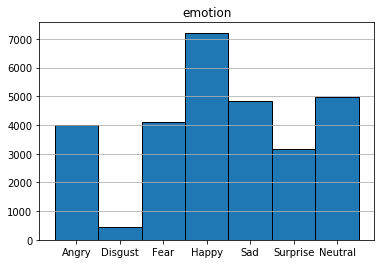

In [15]:
emo = df_training.hist(column='emotion', ec='black', bins=range(8))#class distribution before removing disgust
plt.grid(axis='x')
plt.xticks(ticks=np.arange(0.5,6.6,1), labels=emotion_list)
plt.show()

In [0]:
dict={0:0,1:0,2:1,3:2,4:3,5:4,6:5}
def new_labels(data):
    new_list=[]
    for i in data:
        new_list.append(dict[i]) #changing a labels order and appending to a list
    return new_list
new_list=new_labels(df_training["emotion"])#a new label column
y_train=pd.DataFrame(new_list,columns=["emotion"])

In [0]:
new_list=new_labels(df_validation["emotion"])#a new label column
y_val=pd.DataFrame(new_list,columns=["emotion"])

In [0]:
new_list=new_labels(df_test["emotion"])#a new label column
y_test=pd.DataFrame(new_list,columns=["emotion"])

In [0]:
df_training['emotion'] = y_train['emotion']
df_validation['emotion'] = y_val['emotion']
df_test['emotion'] = y_test['emotion']

In [0]:
new_labeled_emotion = {'Angry': 0, 'Fear': 1, 'Happy': 2,
           'Sad': 3, 'Surprise': 4, 'Neutral': 5}
           
three_class_emotion={"Angry":0,"Happy":2,"Sad":3,"Surprise":4}
three_class_list=["Angry","Happy","Sad","Surprisze"]
new_emotion_list=["Angry","Fear","Happy","Sad","Surprise","Neutral"]

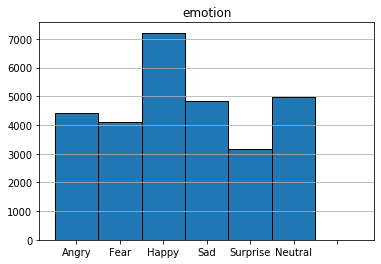

In [21]:
emo = df_training.hist(column='emotion', ec='black', bins=range(8))#class distribution after merging disgust with anger
plt.grid(axis='x')
plt.xticks(ticks=np.arange(0.5,6.6,1), labels=new_emotion_list)
plt.show() 

In [0]:
four_class_training=df_training.loc[(df_training['emotion'] == 0) | (df_training['emotion'] == 2) | (df_training['emotion'] == 3)| (df_training['emotion'] == 4)  ].reset_index(drop=True) #angry happy sad and surprise
four_class_validation=df_validation.loc[(df_validation['emotion'] == 0) |(df_validation['emotion'] == 2) | (df_validation['emotion'] == 3)| (df_validation['emotion'] == 4) ].reset_index(drop=True)
four_class_test=df_test.loc[(df_test['emotion'] == 0) | (df_test['emotion'] == 2) | (df_test['emotion'] == 3)| (df_test['emotion'] == 4)  ].reset_index(drop=True) #angry happy sad and surprise

In [0]:
l=[0,2,3,4]
df=[]
for i in l:
  cl=four_class_training[four_class_training["emotion"] == i][:3000]
  df.append(cl)

In [0]:
four_class_training = pd.concat(df)

In [0]:
four_class_training = shuffle(four_class_training).reset_index()

In [0]:
four_class_training=four_class_training.drop(["index"],axis=1)

In [0]:
dict={0:0,2:1,3:2,4:3} #0 angry happy 1 sad 2 surprise 3
new_list=new_labels(four_class_training["emotion"])#a new label column
y_train=pd.DataFrame(new_list,columns=["emotion"])
four_class_training['emotion'] = y_train['emotion']

In [28]:
four_class_training.head(5)

,emotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273,2274,2275,2276,2277,2278,2279,2280,2281,2282,2283,2284,2285,2286,2287,2288,2289,2290,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,3,12,13,9,5,12,13,13,11,14,13,14,14,13,21,20,23,21,12,8,10,10,5,9,9,4,3,8,9,1,1,2,3,10,9,5,10,14,10,13,...,22,30,31,34,37,40,43,44,51,63,71,73,70,58,43,34,35,34,32,41,53,73,79,18,2,3,1,1,2,1,2,2,2,2,2,2,2,2,2,2
1,0,119,133,114,107,131,145,121,122,142,177,198,203,211,217,225,233,242,246,252,253,253,254,252,250,248,244,244,238,227,216,212,194,179,170,145,151,213,181,111,...,70,66,66,70,74,79,91,108,137,162,170,165,168,170,186,195,198,199,188,171,137,133,48,17,23,20,20,18,18,18,17,18,18,18,18,19,19,19,18,16
2,2,32,32,30,30,31,29,29,30,32,36,40,44,47,51,51,52,55,59,62,64,63,63,62,63,61,62,66,67,69,71,76,76,77,79,78,81,81,79,78,...,36,35,35,34,33,35,35,36,38,42,47,53,51,55,56,54,58,63,69,74,78,83,85,84,88,87,86,87,86,84,84,84,83,82,81,79,77,76,56,46
3,0,74,78,70,73,67,19,21,19,21,19,39,91,145,149,150,149,147,146,147,144,143,143,141,137,136,137,134,133,132,128,126,126,122,119,118,116,115,112,109,...,5,3,0,19,49,56,57,61,59,54,58,63,66,69,69,72,72,73,80,90,90,86,83,72,77,91,50,2,4,4,4,0,4,15,10,16,27,26,26,28
4,2,254,254,253,253,253,252,248,255,187,53,64,76,115,135,112,87,84,76,76,90,101,105,107,102,100,101,87,75,91,102,105,105,105,111,114,112,118,111,113,...,253,250,250,250,171,142,145,143,146,147,149,147,148,152,149,145,146,143,139,135,134,134,133,127,126,120,117,114,109,106,90,154,254,252,251,254,253,253,254,254


In [0]:
new_list=new_labels(four_class_validation["emotion"])#a new label column
y_val=pd.DataFrame(new_list,columns=["emotion"])
four_class_validation['emotion'] = y_val['emotion']

In [0]:
new_list=new_labels(four_class_test["emotion"])#a new label column
y_test=pd.DataFrame(new_list,columns=["emotion"])
four_class_test['emotion'] = y_test['emotion']

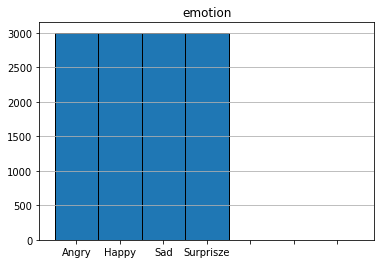

In [31]:
emo = four_class_training.hist(column='emotion', ec='black', bins=range(8))#binary class distribution
plt.grid(axis='x')
plt.xticks(ticks=np.arange(0.5,6.6,1), labels=three_class_list)
plt.show() 

Normalization of Data


In [0]:
x_train=four_class_training.drop("emotion",axis=1)
image = x_train[1:2].values.reshape(48, 48)
x_train = x_train.values.reshape(x_train.shape[0], 48, 48,1)
x_train = x_train.astype("float32")
image = image.astype("float32")
x_train /= 255
image /= 255

In [0]:
x_val=four_class_validation.drop("emotion",axis=1)
x_val = x_val.values.reshape(x_val.shape[0], 48, 48,1)
x_val = x_val.astype("float32")
x_val /= 255

In [0]:
y_train=four_class_training["emotion"]
y_train=np.array(y_train)
y_train = to_categorical(y_train)

In [0]:
y_val=four_class_validation["emotion"]
y_val=np.array(y_val)
y_val = to_categorical(y_val)

In [0]:
x_test=four_class_test.drop("emotion",axis=1)
x_test = x_test.values.reshape(x_test.shape[0], 48, 48,1)
x_test = x_test.astype("float32")
x_test /= 255

In [0]:
y_test=four_class_test["emotion"]
y_test=np.array(y_test)
y_test = to_categorical(y_test)

In [38]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(12000, 48, 48, 1)
(2486, 48, 48, 1)
(12000, 4)
(2486, 4)
(2435, 48, 48, 1)
(2435, 4)


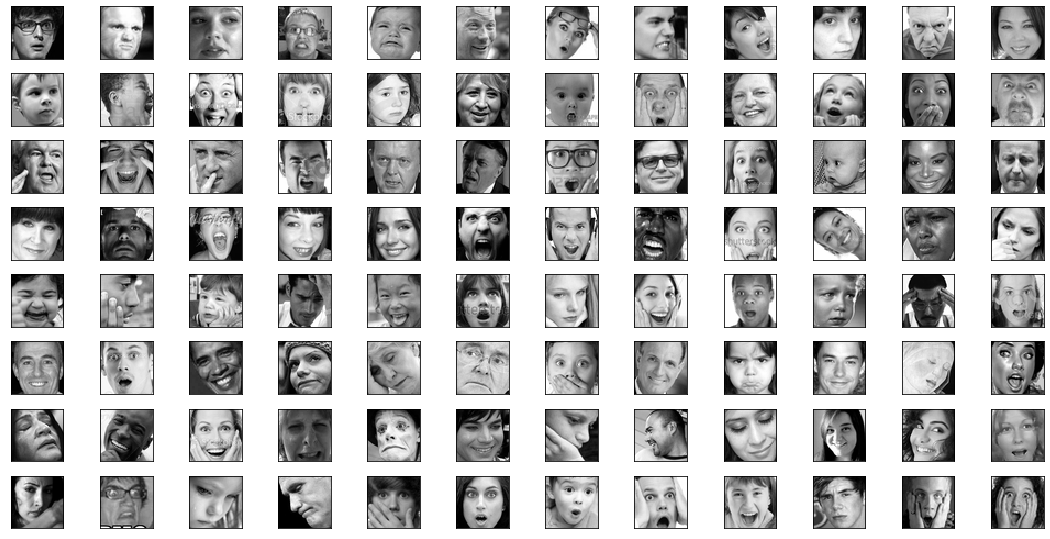

In [39]:
def overview(start, end, X,x,y):
    """
    The function is used to plot first several pictures for overviewing inputs format
    """
    fig = plt.figure(figsize=(x,y))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,95, x_train,15,15)

# Building a Model 



Basic Neural Network Model

In [40]:
basic_model=models.Sequential()
basic_model.add(layers.Flatten())
basic_model.add(layers.Dense(128,activation="relu"))
basic_model.add(layers.Dense(128,activation="relu"))
basic_model.add(layers.Dense(4,activation="softmax"))

basic_model.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])
basic_model.fit(x_train,y_train,epochs=10)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





12000/12000 [==============================] - 11s 888us/step - loss: 1.3414 - acc: 0.3425
Epoch 2/10
12000/12000 [==============================] - 1s 120us/step - loss: 1.2595 - acc: 0.4108
Epoch 3/10
12000/12000 [==============================] - 1s 119us/step - loss: 1.2299 - acc: 0.4301
Epoch 4/10
12000/12000 [==============================] - 1s 121us/step - loss: 1.2006 - acc: 0.4555
Epoch 5/10
12000/12000 [==============================] - 1s 120us/step - loss: 1.1807 - acc: 0.4710
Epoch 6/10
12000/12000 [==============================] - 1s 120us/step - loss: 1.1732 - acc: 0.4722
Epoch 7/10
12000/12000 [==============================] - 1s 121us/step - loss: 1.1511 - acc: 0.4867
Epoch 8/10
12000/12000 [==============================] - 1s 125us/step - loss: 1.1526 - acc: 0.4853
Epoch 9/10
12000/12000 [==============================] - 1s 123us/step - loss: 1.13

In [41]:
val_loss,val_acc=basic_model.evaluate(x_val,y_val)
print(val_loss,val_acc)

2486/2486 [==============================] - 0s 57us/step
1.0953234087912573 0.5277554305301783


In [0]:
basic_model.save("three_classes_basic_model")

Convolution Neural Networks

In [0]:
modelN = models.Sequential()
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(48, 48, 1)))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))

modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
modelN.add(layers.MaxPooling2D(pool_size=(2, 2)))

modelN.add(layers.Dropout(0.8))
modelN.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(64, activation='relu'))
modelN.add(layers.Dense(4, activation='softmax'))

In [106]:
modelN.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
nb_epoch = 25
batch_size = 128
modelF = modelN.fit(x_train, y_train, epochs=nb_epoch, batch_size=batch_size,
          validation_data=(x_val, y_val), shuffle=True, verbose=1)

Train on 12000 samples, validate on 2486 samples
Epoch 1/25
12000/12000 [==============================] - 8s 651us/step - loss: 1.3845 - acc: 0.2868 - val_loss: 1.3842 - val_acc: 0.2506
Epoch 2/25
12000/12000 [==============================] - 3s 290us/step - loss: 1.3379 - acc: 0.3555 - val_loss: 1.2444 - val_acc: 0.4594
Epoch 3/25
12000/12000 [==============================] - 3s 289us/step - loss: 1.1900 - acc: 0.4565 - val_loss: 1.2308 - val_acc: 0.4485
Epoch 4/25
12000/12000 [==============================] - 3s 291us/step - loss: 1.1038 - acc: 0.5143 - val_loss: 1.0719 - val_acc: 0.5386
Epoch 5/25
12000/12000 [==============================] - 3s 292us/step - loss: 1.0309 - acc: 0.5543 - val_loss: 0.9726 - val_acc: 0.5805
Epoch 6/25
12000/12000 [==============================] - 3s 289us/step - loss: 0.9546 - acc: 0.5932 - val_loss: 0.9012 - val_acc: 0.6287
Epoch 7/25
12000/12000 [==============================] - 3s 289us/step - loss: 0.9160 - acc: 0.6088 - val_loss: 0.8427 - v

In [0]:
modelN.save('facial_1')

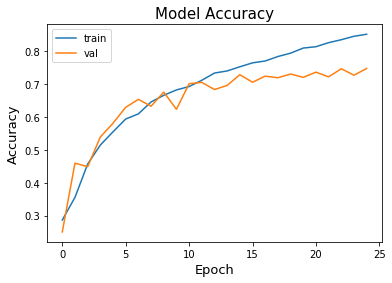

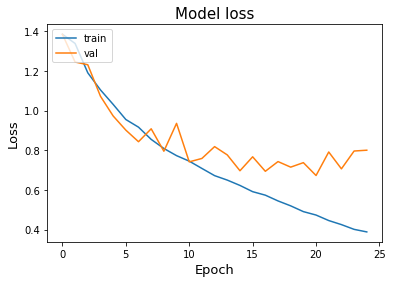

In [107]:
plt.plot(modelF.history['acc'])
plt.plot(modelF.history['val_acc'])
plt.title('Model Accuracy',fontsize=15)
plt.ylabel('Accuracy',fontsize=13)
plt.xlabel('Epoch',fontsize=13)
plt.legend(['train', 'val'], loc='upper left')
plt.show()



plt.plot(modelF.history['loss'])
plt.plot(modelF.history['val_loss'])
plt.title('Model loss',fontsize=15)
plt.ylabel('Loss',fontsize=13)
plt.xlabel('Epoch',fontsize=13)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [108]:
score = modelN.evaluate(x_test, y_test, verbose=0)
print ("model %s: %.2f%%" % (modelN.metrics_names[1], score[1]*100))

model acc: 75.40%


In [0]:
y_prob = modelN.predict(x_test, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_test]

In [0]:
first_twenty_prediction=y_pred[0:23]
first_twenty_values=y_true[0:23]

In [111]:
"First ten predicted images"
four_class_emotion={0:"Angry",1:"Happy",2:"Sad",3:"Surprise"}
t = PrettyTable(['Predicted', 'True Class'])
for i in range(23):
  t.add_row([four_class_emotion[first_twenty_prediction[i]],four_class_emotion[first_twenty_values[i]]])
print(t)

+-----------+------------+
| Predicted | True Class |
+-----------+------------+
|   Angry   |   Angry    |
|    Sad    |  Surprise  |
|    Sad    |    Sad     |
|   Angry   |   Angry    |
|    Sad    |    Sad     |
|   Happy   |   Happy    |
|   Angry   |   Angry    |
|   Happy   |   Happy    |
|  Surprise |  Surprise  |
|   Happy   |   Happy    |
|    Sad    |    Sad     |
|    Sad    |    Sad     |
|    Sad    |   Angry    |
|  Surprise |  Surprise  |
|    Sad    |    Sad     |
|   Happy   |   Happy    |
|   Angry   |   Angry    |
|   Happy   |   Happy    |
|  Surprise |  Surprise  |
|   Happy   |   Happy    |
|    Sad    |    Sad     |
|    Sad    |   Angry    |
|   Angry   |   Angry    |
+-----------+------------+


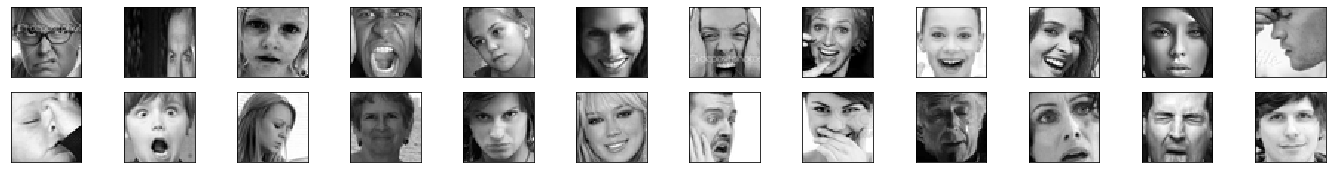

In [0]:
overview(0,23, x_test,19,19)#first 23 images

Data Preproccessing for Transfer Learning

In [112]:
v=[]
for i in  x_val:
  resized = cv2.resize(i, (224,224), interpolation = cv2.INTER_AREA)
  v.append(resized)
x_val1 = np.asarray(v)
x_val1.shape

(2486, 224, 224)

In [114]:
x1=[]
for i in  x_train:
  resized = cv2.resize(i, (224,224), interpolation = cv2.INTER_AREA)
  x1.append(resized)
x_train1 = np.asarray(x1)
x_train1.shape

(12000, 224, 224)

In [115]:
x_train1= np.repeat(x_train1[..., np.newaxis], 3, -1)
print(x_train1.shape)  # (n, 224, 224, 3)

(12000, 224, 224, 3)


In [116]:
x_val1 = np.repeat(x_val1[..., np.newaxis], 3, -1)
print(x_val1.shape)  # (64, 224, 224, 3)

(2486, 224, 224, 3)


Building our Transfer Learning Model

In [0]:
link="https://drive.google.com/open?id=1Mk5EYg1i0uc-vea9wNV7XXu2hLlVvoeI"
fluff, id = link.split('=')
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile("resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")  

In [0]:
resnet_weights_path="resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [0]:
model = Sequential()
model.add(ResNet50(include_top = False, pooling = 'avg', weights = resnet_weights_path))
model.add(Dense(64, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(4, activation = "softmax"))
model.layers[0].trainable = False

In [153]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_22 (Dense)             (None, 64)                131136    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 516       
Total params: 23,727,684
Trainable params: 139,972
Non-trainable params: 23,587,712
_________________________________________________________________


In [0]:
optimizer = optimizers.rmsprop()
model.compile(optimizer =optimizer , loss = "categorical_crossentropy", metrics = ["accuracy"])

In [155]:
nb_epoch = 5
batch_size = 128
modelT = model.fit(x_train1, y_train, nb_epoch=nb_epoch, batch_size=batch_size,
          validation_data=(x_val1, y_val), shuffle=True, verbose=1)

Train on 12000 samples, validate on 2486 samples
Epoch 1/5
12000/12000 [==============================] - 35s 3ms/sample - loss: 1.2081 - acc: 0.4568 - val_loss: 1.3539 - val_acc: 0.3600
Epoch 2/5
12000/12000 [==============================] - 28s 2ms/sample - loss: 1.0452 - acc: 0.5507 - val_loss: 1.4068 - val_acc: 0.2104
Epoch 3/5
12000/12000 [==============================] - 28s 2ms/sample - loss: 0.9830 - acc: 0.5842 - val_loss: 1.4408 - val_acc: 0.2104
Epoch 4/5
12000/12000 [==============================] - 28s 2ms/sample - loss: 0.9264 - acc: 0.6135 - val_loss: 1.4559 - val_acc: 0.2116
Epoch 5/5
12000/12000 [==============================] - 28s 2ms/sample - loss: 0.8991 - acc: 0.6258 - val_loss: 1.4775 - val_acc: 0.2104
